# Итоговое задание Юнит 2

Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике,
чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

Задачи проекта:
1) Провести первичную обработку данных.
2) Посмотреть на распределение признака для числовых переменных, устраните выбросы.
3) Оценить количество уникальных значений для номинативных переменных.
4) По необходимости преобразовать данные
5) Провесьт корреляционный анализ количественных переменных
6) Отобрать не коррелирующие переменные.
7) Проанализировать номинативные переменные и устранить те, которые не влияют на предсказываемую величину
(в нашем случае — на переменную score).
8) Сформулировать выводы.


In [739]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from itertools import combinations
# from scipy.stats import ttest_ind
from IPython.display import display

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

stud = pd.read_csv('stud_math.csv')

In [740]:
def object_col_info(col):
    display(pd.DataFrame(stud[col].value_counts()))
    # display("Значений, встретившихся в столбце более 10 раз:"
    #       , (stud[col].value_counts()>10).sum())
    stud.loc[:, [col]].info()

def number_col_info(col):
    stud[col].hist()
    display(stud[col].describe())

def check_emission(col):
    perc25 = stud[col].quantile(0.25)
    perc75 = stud[col].quantile(0.75)
    IQR = perc75 - perc25

    print(
    'Колонка', col,
    '25-й перцентиль: {},'.format(perc25),
    '75-й перцентиль: {},'.format(perc75),
    "IQR: {}, ".format(IQR),
    "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR)
    )
    emission = len(stud[col]) - len(stud.loc[stud[col].between(
    perc25 - 1.5*IQR,
    perc75 + 1.5*IQR)])
    # print(emission)
    if emission > 0:
        print ('Выбросы присутствуют -', emission)
    else:
        print ('Выбросы отсутствуют')

def clear_emission(col):
    perc25 = stud[col].quantile(0.25)
    perc75 = stud[col].quantile(0.75)
    IQR = perc75 - perc25

    return stud.loc[stud[col].between(
    perc25 - 1.5*IQR,
    perc75 + 1.5*IQR)]

def fill_empty(col, value):
    return stud[col].apply(lambda x: value if pd.isnull(x) else value if str(x).strip() == '' else x )

def fill_empty_most_popular(col):
    return fill_empty(col, stud[col].value_counts().index.tolist()[0])

def fill_empty_median(col):
    return fill_empty(col, stud[col].median())


In [741]:
# приведем все колонки к одному формату
stud.columns = [x.lower() for x in stud.columns ]

Первичный анализ говорит нам, что в датасете присутсвуют 395 записей и 30 столбцов.
13 столбцов содержат количественные данные, а 17 - номинативные.
Данные по столбцам заполнены полностью, либо с потерей не значительной части данных.
Максимальное отсутсвие 45 из 395.

In [742]:
display(stud.head(10))
stud.info()


,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   pstatus              350 non-null    object 
 6   medu                 392 non-null    float64
 7   fedu                 371 non-null    float64
 8   mjob                 376 non-null    object 
 9   fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Из матрицы кореляций видим, что колонка "studytime, granular" корелирует с остальными так же как колонка studytime,
только с обратным знаком,
поэтому для дальнейших условий она врядли нам будет полезна и ее можно исключить.


In [743]:
stud.corr()

,age,medu,fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.161704,-0.138018,0.081508,-0.015556,0.228047,0.015556,0.068899,0.029023,0.135107,-0.065946,0.093592,-0.155726
medu,-0.161704,1.000000,0.275598,-0.173515,0.078589,-0.245463,-0.078589,-0.010050,0.025335,0.064164,-0.045051,-0.011944,0.213349
fedu,-0.138018,0.275598,1.000000,0.030646,0.057199,-0.150821,-0.057199,0.040577,-0.066556,-0.023282,0.027251,0.004695,0.078573
traveltime,0.081508,-0.173515,0.030646,1.000000,-0.102206,0.064699,0.102206,-0.016857,-0.021937,0.037636,-0.021531,-0.048215,-0.070559
studytime,-0.015556,0.078589,0.057199,-0.102206,1.000000,-0.178992,-1.000000,0.045894,-0.121969,-0.051280,-0.080016,-0.026544,0.115741
failures,0.228047,-0.245463,-0.150821,0.064699,-0.178992,1.000000,0.178992,-0.022655,0.098382,0.120914,0.081284,0.057391,-0.344338
"studytime, granular",0.015556,-0.078589,-0.057199,0.102206,-1.000000,0.178992,1.000000,-0.045894,0.121969,0.051280,0.080016,0.026544,-0.115741
famrel,0.068899,-0.010050,0.040577,-0.016857,0.045894,-0.022655,-0.045894,1.000000,0.175743,0.081154,0.077474,-0.082609,0.057112
freetime,0.029023,0.025335,-0.066556,-0.021937,-0.121969,0.098382,0.121969,0.175743,1.000000,0.296437,0.061575,0.009292,0.019026
goout,0.135107,0.064164,-0.023282,0.037636,-0.051280,0.120914,0.051280,0.081154,0.296437,1.000000,-0.015608,-0.048738,-0.129685


In [744]:
stud.drop(['studytime, granular'], inplace = True, axis = 1)

## Анализ данных

### school — аббревиатура школы, в которой учится ученик

Пропуски отсутствуют, в датасете представленны данные всего 2ух школ

In [745]:
object_col_info('school')

,school
GP,349
MS,46


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


### sex — пол ученика ('F' - женский, 'M' - мужской)

Пропуски отсутствуют, женщины и мужчины в выборке распределенны примерно 50 на 50

In [746]:
object_col_info('sex')

,sex
F,208
M,187


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


### age — возраст ученика (от 15 до 22)

Пропуски отсутсвуют, большинство учеников в возрасте от 16 до 18 лет.

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

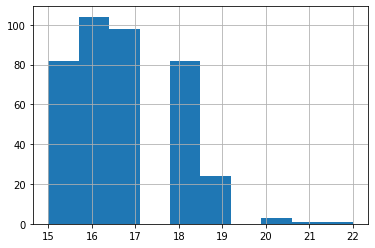

In [747]:
number_col_info('age')

В датасете присутствует выброс - ученик с возрастом 22 год.
Устраним выброс.

In [748]:
check_emission('age')
stud = clear_emission('age')

Колонка age 25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].
Выбросы присутствуют - 1


### address — тип адреса ученика ('U' - городской, 'R' - за городом)

В датасете присутствует 17 пропусков, из остальных данных видим, что преобладают ученики живущие за городом.
На данном этапе заполним пропуски самым частым значением.

In [749]:
stud['address'] = fill_empty_most_popular('address')
object_col_info('address')

,address
U,311
R,83


<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  394 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


### famsize — размер семьи('LE3' <= 3, 'GT3' >3)

В датасете присутствует 17 пропусков, из остальных данных видим, что преобладают ученики из многодетных семей.
На данном этапе заполним пропуски самым частым значением.

In [750]:
stud['famsize'] = fill_empty_most_popular('famsize')
object_col_info('famsize')

,famsize
GT3,287
LE3,107


<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsize  394 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


### pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

В датасете присутствует 45 пропусков, из остальных данных видим, что преобладают ученики у которых родители живут вместе.
На данном этапе заполним пропуски самым частым значением.

In [751]:
stud['pstatus'] = fill_empty_most_popular('pstatus')
object_col_info('pstatus')

,pstatus
T,358
A,36


<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   pstatus  394 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


### medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

В датасете присутствуют 3 пропуска, заполним их медианным значением.

count    394.000000
mean       2.751269
std        1.095473
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: medu, dtype: float64

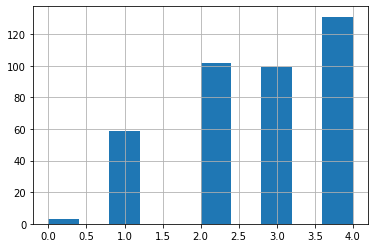

In [752]:
stud['medu'] = fill_empty_median('medu')
number_col_info('medu')

В датасете отсутсвуют выбросы по признаку образования матери

In [753]:
check_emission('medu')

Колонка medu 25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0,  Границы выбросов: [-1.0, 7.0].
Выбросы отсутствуют


### fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

В датасете присутсвуют пропуски и присутсвует значение 40, сделаем предположение, что это опечатка и заменим его на 4,
а пропуски заменим на медиану.

count    394.000000
mean       2.520305
std        1.053695
min        0.000000
25%        2.000000
50%        2.500000
75%        3.000000
max        4.000000
Name: fedu, dtype: float64

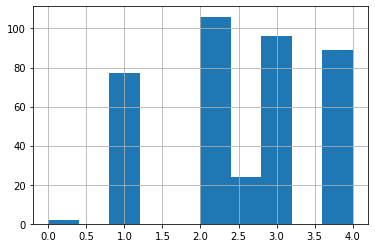

In [754]:
stud['fedu'] = stud['fedu'].apply(lambda x: 4 if x == 40 else x)
stud['fedu'] = fill_empty_median('fedu')
number_col_info('fedu')


В датасете присутсвуют выбросы - устраним их.

In [755]:
check_emission('fedu')
stud = clear_emission('fedu')

Колонка fedu 25-й перцентиль: 2.0, 75-й перцентиль: 3.0, IQR: 1.0,  Границы выбросов: [0.5, 4.5].
Выбросы присутствуют - 2


### mjob — работа матери
('teacher' - учитель,
'health' - сфера здравоохранения,
'services' - гос служба,
'at_home' - не работает,
'other' - другое)

В датасете присутсвуют пропуски, заполним их самым частым значением.
Из информации видно, что самый частый вариант "другое" - можно сделать вывод, что результаты по этой колонке
не будут очень информативными.

In [756]:
stud['mjob'] = fill_empty_most_popular('mjob')
object_col_info('mjob')

,mjob
other,151
services,97
at_home,58
teacher,54
health,32


<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mjob    392 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


### fjob — работа отца
('teacher' - учитель,
 'health' - сфера здравоохранения,
 'services' - гос служба,
 'at_home' - не работает,
 'other' - другое)

В датасете присутсвуют пропуски, заполним их самым частым значением.
Из информации видно, что самый частый вариант "другое" - можно сделать вывод, что результаты по этой колонке
не будут очень информативными.

In [757]:
stud['fjob'] = fill_empty_most_popular('fjob')
object_col_info('fjob')

,fjob
other,231
services,101
teacher,29
at_home,16
health,15


<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   fjob    392 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


### reason причина выбора школы
('home' - близость к дому,
'reputation' - репутация школы,
'course' - образовательная программа,
'other' - другое)

В датасете присутсвуют 17 пропусков, но распределение других очень близко,
поэтому мы не можем заполнить пустые значения самым популярным.
Так же среди возможных вариантов присутсвует вариант "другое", предположим, что пустое значение оставили те,
кто не смог определиться и заполним пустые значения вариантом "other"

In [758]:
stud['reason'] = fill_empty('reason', 'other')
object_col_info('reason')

,reason
course,136
home,104
reputation,102
other,50


<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  392 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


### guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

В датасете присутствуют пропуски, mother является самым популярным.
На данном этапе заполним пропуски самым частым значением.

In [759]:
stud['guardian'] = fill_empty_most_popular('guardian')
object_col_info('guardian')

,guardian
mother,278
father,86
other,28


<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  392 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


### traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

В датасете присутствуют пропуски, заполним их медианным значением.

count    392.000000
mean       1.405612
std        0.679453
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

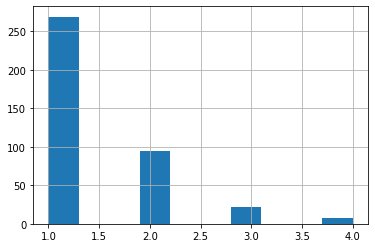

In [760]:
stud['traveltime'] = fill_empty_median('traveltime')
number_col_info('traveltime')

В датасете присутсвуют выбросы - устраним их.

In [761]:
check_emission('traveltime')
stud = clear_emission('traveltime')

Колонка traveltime 25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,  Границы выбросов: [-0.5, 3.5].
Выбросы присутствуют - 7


### studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
В датасете присутствуют пропуски, заполним их медианным значением.

count    385.000000
mean       2.036364
std        0.825207
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

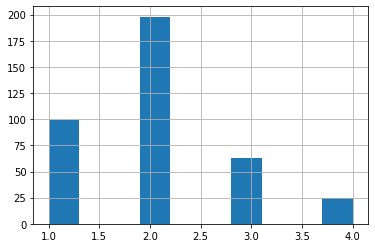

In [762]:
stud['studytime'] = fill_empty_median('studytime')
number_col_info('studytime')

В датасете присутсвуют выбросы - устраним их.

In [763]:
check_emission('studytime')
stud = clear_emission('studytime')

Колонка studytime 25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,  Границы выбросов: [-0.5, 3.5].
Выбросы присутствуют - 25


### failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)
В датасете присутствуют пропуски, заполним их медианным значением.

count    360.000000
mean       0.322222
std        0.713230
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

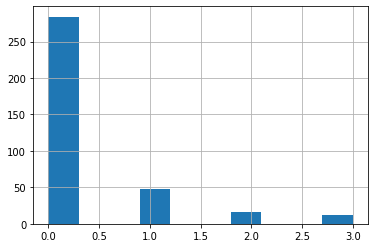

In [764]:
stud['failures'] = fill_empty_median('failures')
number_col_info('failures')

В датасете присутствуют выбросы из-за того что большинство учеников не имеет внеучебных задач,
но количество учеников с задачами все же существенно, то выбросы по failures не удаляем.

In [765]:
check_emission('failures')

Колонка failures 25-й перцентиль: 0.0, 75-й перцентиль: 0.0, IQR: 0.0,  Границы выбросов: [0.0, 0.0].
Выбросы присутствуют - 76


### schoolsup — дополнительная образовательная поддержка (yes или no)

Есть пропуски, заполним их самым частым вариантом

In [766]:
stud['schoolsup'] = fill_empty_most_popular('schoolsup')
object_col_info('schoolsup')

,schoolsup
no,316
yes,44


<class 'pandas.core.frame.DataFrame'>
Int64Index: 360 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   schoolsup  360 non-null    object
dtypes: object(1)
memory usage: 5.6+ KB


### famsup — семейная образовательная поддержка (yes или no)
Есть пропуски, заполним их самым частым вариантом

In [767]:
stud['famsup'] = fill_empty_most_popular('famsup')
object_col_info('famsup')

,famsup
yes,233
no,127


<class 'pandas.core.frame.DataFrame'>
Int64Index: 360 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   famsup  360 non-null    object
dtypes: object(1)
memory usage: 5.6+ KB


### paid — дополнительные платные занятия по математике (yes или no)

Есть пропуски, заполним их самым частым вариантом

In [768]:
stud['paid'] = fill_empty_most_popular('paid')
object_col_info('paid')

,paid
no,222
yes,138


<class 'pandas.core.frame.DataFrame'>
Int64Index: 360 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    360 non-null    object
dtypes: object(1)
memory usage: 5.6+ KB


### activities — дополнительные внеучебные занятия (yes или no)

Есть пропуски, но распределение вариантов близко к 50 на 50, потому пропуски заполним случайно.


In [769]:
stud['activities'] = stud['activities'].apply(lambda x: 'yes' if np.random.randint(2) == 1 else 'no')
object_col_info('activities')

,activities
yes,192
no,168


<class 'pandas.core.frame.DataFrame'>
Int64Index: 360 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   activities  360 non-null    object
dtypes: object(1)
memory usage: 5.6+ KB


### nursery — посещал детский сад (yes или no)

Есть пропуски, заполним их самым частым вариантом

In [770]:
stud['nursery'] = fill_empty_most_popular('nursery')
object_col_info('nursery')

,nursery
yes,287
no,73


<class 'pandas.core.frame.DataFrame'>
Int64Index: 360 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  360 non-null    object
dtypes: object(1)
memory usage: 5.6+ KB


### higher — хочет получить высшее образование (yes или no)

Есть пропуски, заполним их самым частым вариантом

In [771]:
stud['higher'] = fill_empty_most_popular('higher')
object_col_info('higher')

,higher
yes,343
no,17


<class 'pandas.core.frame.DataFrame'>
Int64Index: 360 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   higher  360 non-null    object
dtypes: object(1)
memory usage: 5.6+ KB


### internet — наличие интернета дома (yes или no)

In [772]:
stud['internet'] = fill_empty_most_popular('internet')
object_col_info('internet')

,internet
yes,309
no,51


<class 'pandas.core.frame.DataFrame'>
Int64Index: 360 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  360 non-null    object
dtypes: object(1)
memory usage: 5.6+ KB


### romantic — в романтических отношениях (yes или no)
Есть пропуски, заполним их самым частым вариантом

In [773]:
stud['romantic'] = fill_empty_most_popular('romantic')
object_col_info('romantic')

,romantic
no,246
yes,114


<class 'pandas.core.frame.DataFrame'>
Int64Index: 360 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   romantic  360 non-null    object
dtypes: object(1)
memory usage: 5.6+ KB


### famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

В датасете присутсвует вариант -1, который является заведомо неверным, исключим его из выборки.
Пропуски заполним медианой

count    359.000000
mean       3.958217
std        0.842935
min        1.000000
25%        4.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: famrel, dtype: float64

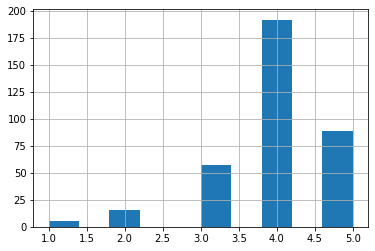

In [774]:
stud['famrel'] = fill_empty_median('famrel')
stud = stud.loc[stud.famrel >= 1]
number_col_info('famrel')

В датасете присутсвуют выбросы так как у большей части семей хорошие отношения.
Данные на основе выбросов по famrel удалять не будем.

In [775]:
check_emission('famrel')

Колонка famrel 25-й перцентиль: 4.0, 75-й перцентиль: 4.0, IQR: 0.0,  Границы выбросов: [4.0, 4.0].
Выбросы присутствуют - 167


### goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

Заменим пустые значения на медиану

count    359.000000
mean       3.097493
std        1.090318
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

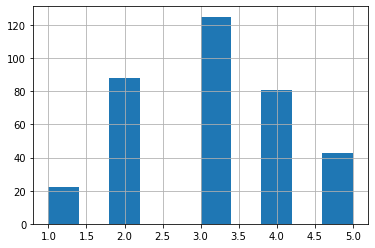

In [776]:
stud['goout'] = fill_empty_median('goout')
number_col_info('goout')

Выбросы отсутсвуют.

In [777]:
check_emission('goout')

Колонка goout 25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0,  Границы выбросов: [-1.0, 7.0].
Выбросы отсутствуют


### health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
Заменим пустые значения на медиану

count    359.000000
mean       3.568245
std        1.380306
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

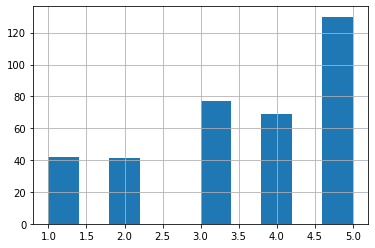

In [778]:
stud['health'] = fill_empty_median('health')
number_col_info('health')

Выбросы отсутсвуют.

In [779]:
check_emission('health')

Колонка health 25-й перцентиль: 3.0, 75-й перцентиль: 5.0, IQR: 2.0,  Границы выбросов: [0.0, 8.0].
Выбросы отсутствуют


### absences — количество пропущенных занятий
Заменим пустые значения на медиану

count    359.000000
mean       7.415042
std       24.191806
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

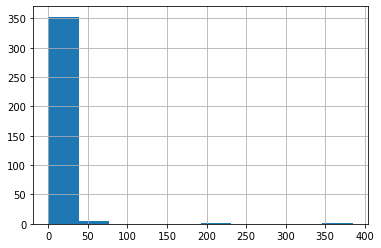

In [780]:
stud['absences'] = fill_empty_median('absences')
number_col_info('absences')

В датасете присутствуют выбросы, удалим их

In [781]:
check_emission('absences')
stud = clear_emission('absences')

Колонка absences 25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].
Выбросы присутствуют - 17


## Корреляционный анализ

строим графики зависимости переменных

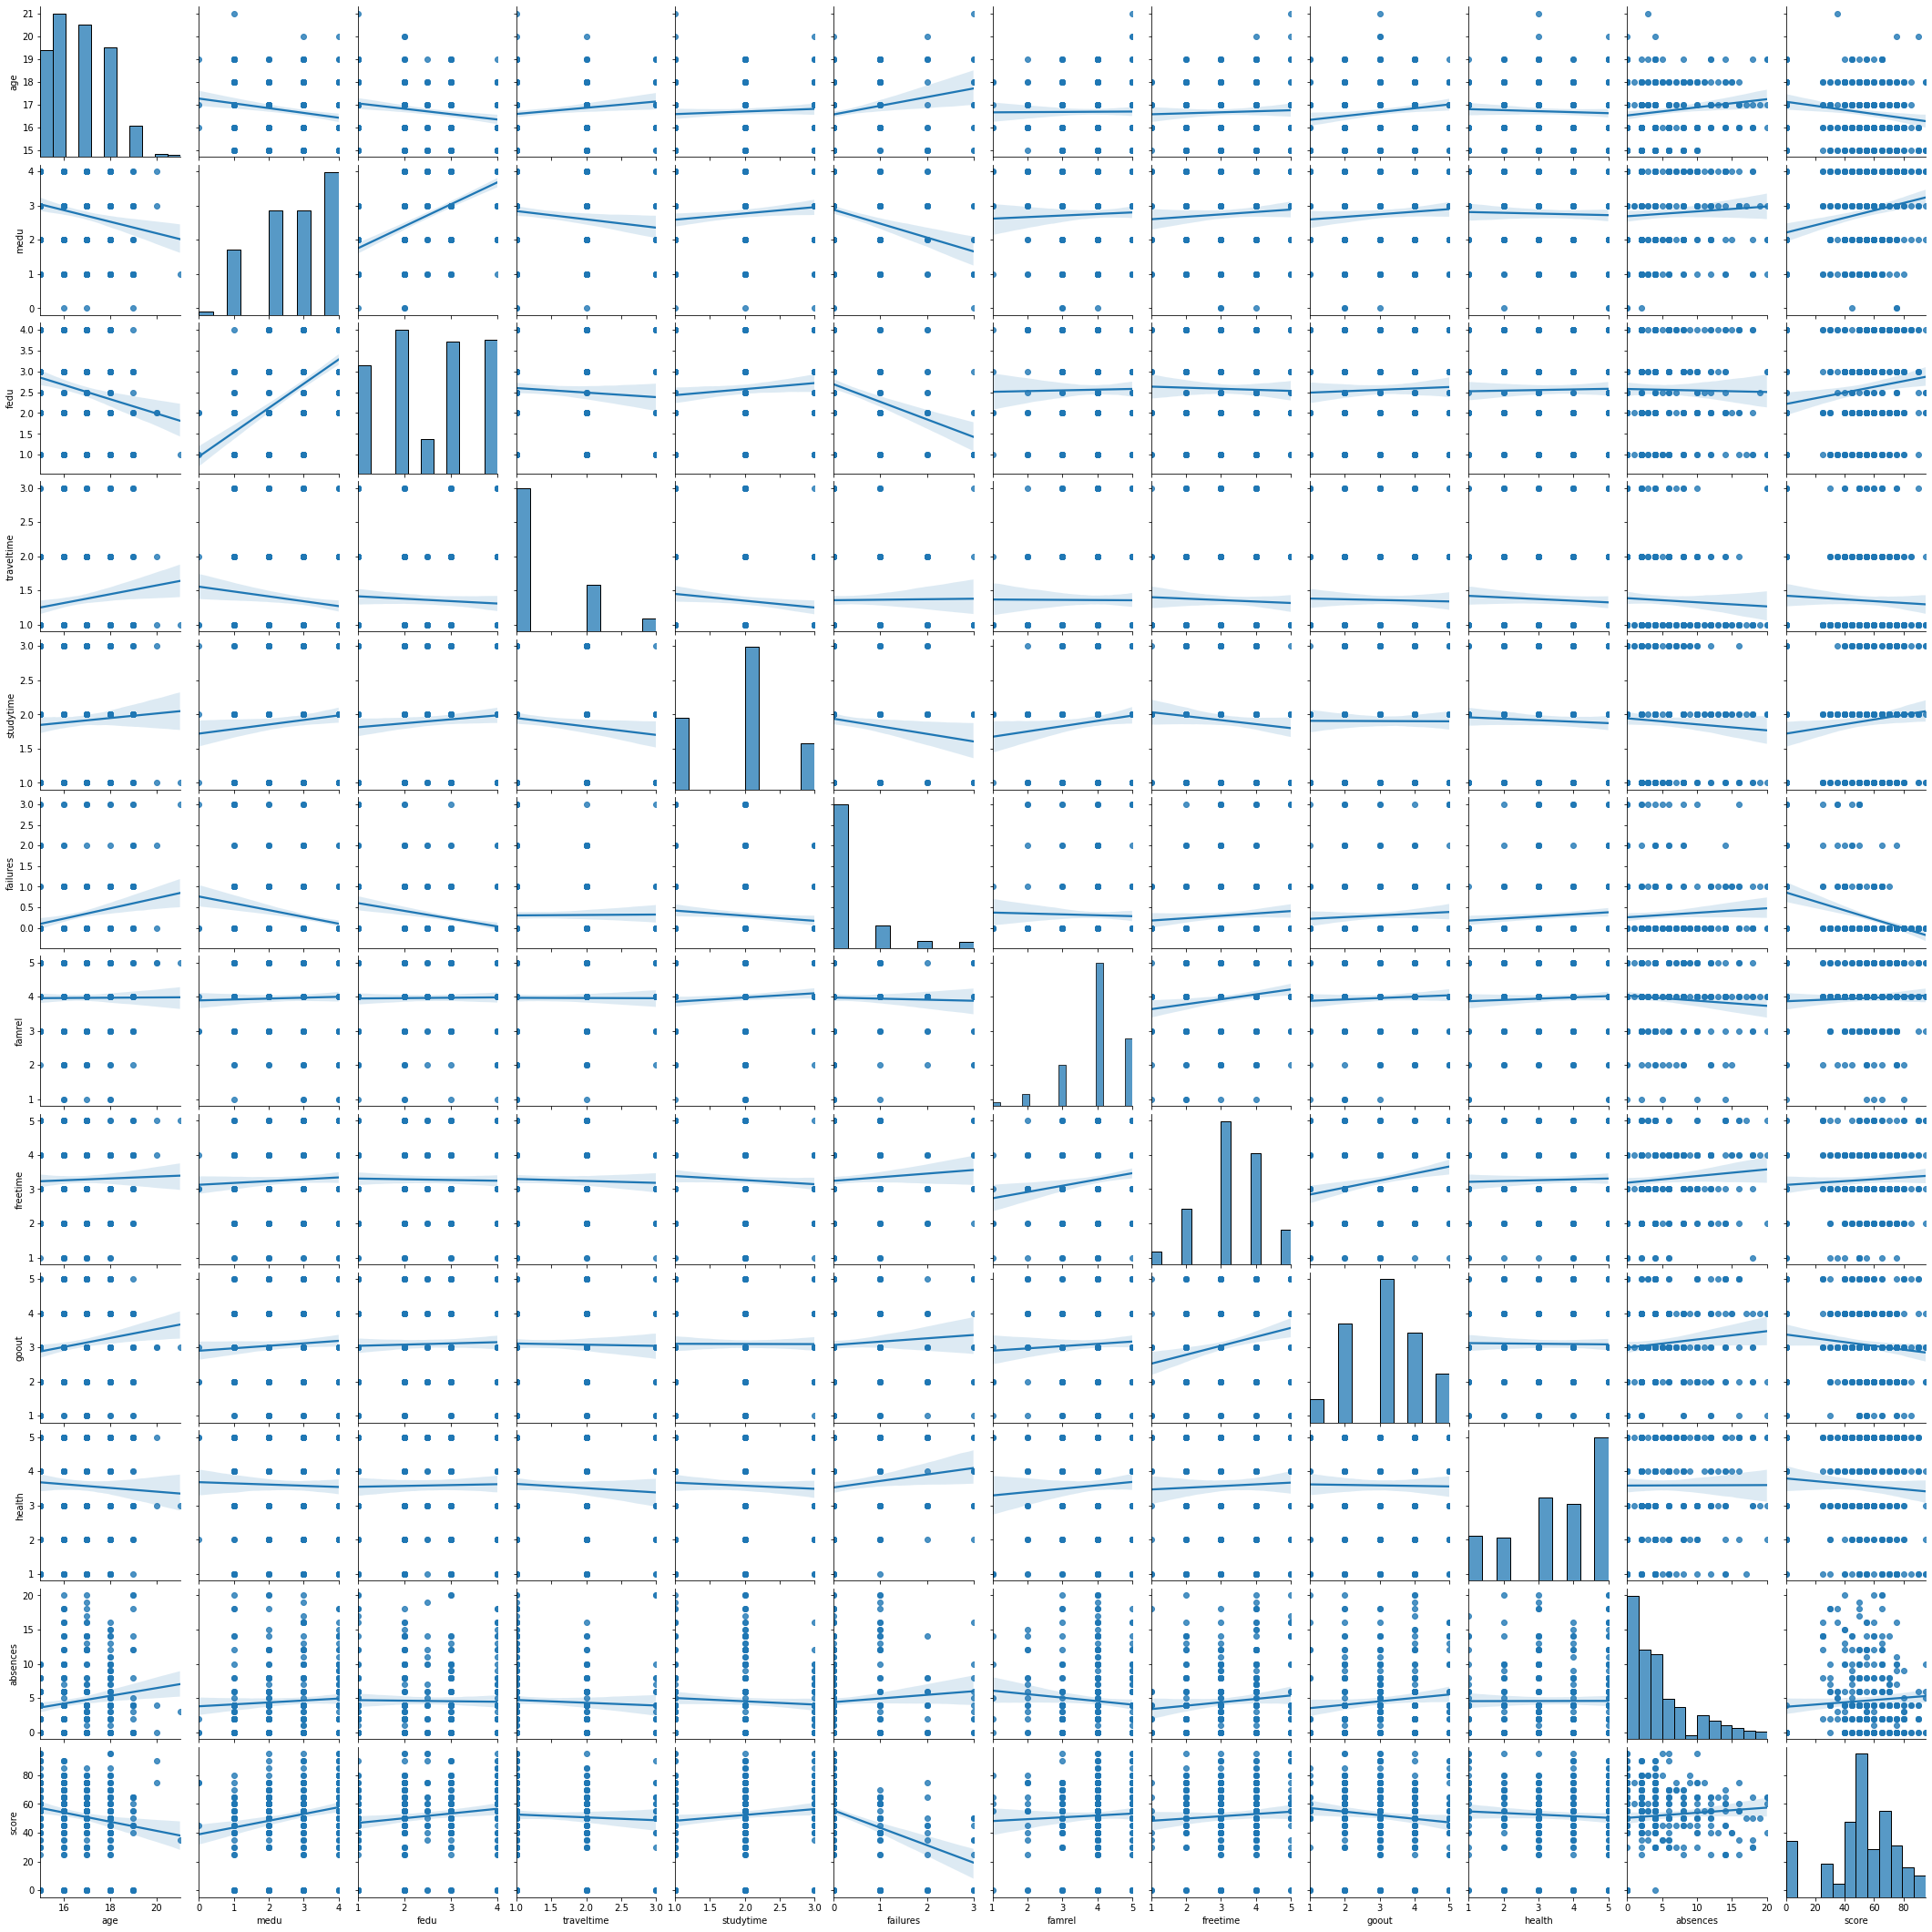

In [782]:
sns.pairplot(stud, kind = 'reg')